In [34]:
import json
import numpy as np
import math
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
categories = pd.read_excel("../Sheets/Tasks_and_Tags.xlsx")

In [40]:
OUTLIER_THRESHOLD = 1000

def getValues(language, grouped_by_tag=True):
    dataPython={}
    if language == "Python":
        with open('../Results/resultsPython.json') as json_file:
            dataPython = json.load(json_file)
    if language=="Java":
        with open('../Results/resultsJava.json') as json_file:
            dataPython = json.load(json_file)
    if language == "C++":
        with open('../Results/resultsC.json') as json_file:
            dataPython = json.load(json_file)
    human={}
    o1={}
    copilot={}
    four_o={}
    
    human_powermetrics={}
    o1_powermetrics={}
    four_o_powermetrics={}
    copilot_powermetrics={}
    
    for task in dataPython.keys():
        mean_energy=np.mean(dataPython[task]["human"]["Energy Linux"]).item()
        mean_energy_o1=np.mean(dataPython[task]["o1"]["Energy Linux"]).item()
        mean_energy_4o=np.mean(dataPython[task]["4o"]["Energy Linux"]).item()
        mean_energy_copilot=np.mean(dataPython[task]["copilot"]["Energy Linux"]).item()
        mean_energy_powermetrics=np.mean(dataPython[task]["human"]["Energy"]).item()
        mean_energy_powermetrics_o1=np.mean(dataPython[task]["o1"]["Energy"]).item()
        mean_energy_powermetrics_4o=np.mean(dataPython[task]["4o"]["Energy"]).item()
        mean_energy_powermetrics_copilot=np.mean(dataPython[task]["copilot"]["Energy"]).item()
        
        if not np.isnan(mean_energy_powermetrics) and not np.isnan(mean_energy_powermetrics_o1) and not np.isnan(mean_energy_powermetrics_4o) and not np.isnan(mean_energy_powermetrics_copilot) and mean_energy>12 and mean_energy_o1>12 and mean_energy_copilot>12 and mean_energy_4o>12 and mean_energy_o1<OUTLIER_THRESHOLD:
            human_powermetrics[task]=mean_energy_powermetrics
        #if not np.isnan(mean_energy_powermetrics_o1) and not np.isnan(mean_energy_powermetrics):
            o1_powermetrics[task]=mean_energy_powermetrics_o1
        #if not np.isnan(mean_energy_powermetrics_4o) and not np.isnan(mean_energy_powermetrics):
            four_o_powermetrics[task]=mean_energy_powermetrics_4o
        #if not np.isnan(mean_energy_powermetrics_copilot) and not np.isnan(mean_energy_powermetrics):
            copilot_powermetrics[task]=mean_energy_powermetrics_copilot
            
        #if mean_energy>12 and mean_energy_o1>12 and mean_energy_copilot>12 and mean_energy_4o>12:
            human[task]=mean_energy
        #if mean_energy_o1>12 and mean_energy>12:
            o1[task]=mean_energy_o1
        #if mean_energy_copilot>12 and mean_energy>12:
            copilot[task]=mean_energy_copilot
            #human[task]=mean_energy
        #if mean_energy_4o>12 and mean_energy>12:
            four_o[task]=mean_energy_4o
    
    all_tags={}
    all_tags_o1={}
    all_tags_copilot={}
    all_tags_4o={}
    
    all_tags_powermetrics={}
    all_tags_o1_powermetrics={}
    all_tags_4o_powermetrics={}
    all_tags_copilot_powermetrics={}
    
    for task in categories["Name "]:
        name=task.replace(" ","_")
        tags=categories[categories["Name "]==task]["Tags "].to_list()[0].split(",")
        for t in tags:
            if t.strip() not in all_tags.keys():
                all_tags[t.strip()]=[]
            if name in human.keys():
                all_tags[t.strip()].append(human[name])  
            if t.strip() not in all_tags_o1.keys():
                all_tags_o1[t.strip()]=[]
            if name in o1.keys():
                all_tags_o1[t.strip()].append(o1[name])
            if t.strip() not in all_tags_copilot.keys():
                all_tags_copilot[t.strip()]=[]
            if name in copilot.keys():
                all_tags_copilot[t.strip()].append(copilot[name])  
            if t.strip() not in all_tags_4o.keys():
                all_tags_4o[t.strip()]=[]
            if name in four_o.keys():
                all_tags_4o[t.strip()].append(four_o[name])
            
            if t.strip() not in all_tags_powermetrics.keys():
                all_tags_powermetrics[t.strip()]=[]
            if name in human_powermetrics.keys():
                all_tags_powermetrics[t.strip()].append(human_powermetrics[name])  
            if t.strip() not in all_tags_o1_powermetrics.keys():
                all_tags_o1_powermetrics[t.strip()]=[]
            if name in o1_powermetrics.keys():
                all_tags_o1_powermetrics[t.strip()].append(o1_powermetrics[name])
            if t.strip() not in all_tags_4o_powermetrics.keys():
                all_tags_4o_powermetrics[t.strip()]=[]
            if name in four_o_powermetrics.keys():
                all_tags_4o_powermetrics[t.strip()].append(four_o_powermetrics[name])
            if t.strip() not in all_tags_copilot_powermetrics.keys():
                all_tags_copilot_powermetrics[t.strip()]=[]
            if name in copilot_powermetrics.keys():
                all_tags_copilot_powermetrics[t.strip()].append(copilot_powermetrics[name])
    
    ordered_human={k: v for k, v in sorted(human.items(), key=lambda item: item[1])}
    ordered_o1={k: v for k, v in sorted(o1.items(), key=lambda item: item[1])}
    ordered_copilot={k: v for k, v in sorted(copilot.items(), key=lambda item: item[1])}
    ordered_4o={k: v for k, v in sorted(four_o.items(), key=lambda item: item[1])}
    
    ordered_human_powermetrics={k: v for k, v in sorted(human_powermetrics.items(), key=lambda item: item[1])}
    ordered_o1_powermetrics={k: v for k, v in sorted(o1_powermetrics.items(), key=lambda item: item[1])}
    ordered_4o_powermetrics={k: v for k, v in sorted(four_o_powermetrics.items(), key=lambda item: item[1])}
    ordered_copilot_powermetrics={k: v for k, v in sorted(copilot_powermetrics.items(), key=lambda item: item[1])}
    
    count=0
    tags_graph=[]
    energy_graph=[]
    order_graph=[]
    for key in ordered_human.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_human[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph.append(tag.strip())
                energy_graph.append(ordered_human[key])
                order_graph.append(count)
            count+=1
    
    tags_energies={}
    for i in range(len(tags_graph)):
        if tags_graph[i] not in tags_energies.keys():
            tags_energies[tags_graph[i]]=[]
        tags_energies[tags_graph[i]].append(energy_graph[i])
    
    for k in tags_energies.keys():
        tags_energies[k]=np.mean(tags_energies[k]).item()
    tags_energies = {k: v for k, v in sorted(tags_energies.items(), key=lambda item: item[1])}
    
    count_pw=0
    tags_graph_pw=[]
    energy_graph_pw=[]
    order_graph_pw=[]
    for key in ordered_human_powermetrics.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_human_powermetrics[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph_pw.append(tag.strip())
                energy_graph_pw.append(ordered_human_powermetrics[key])
                order_graph_pw.append(count_pw)
            count_pw+=1
    
    tags_energies_pw={}
    for i in range(len(tags_graph_pw)):
        if tags_graph_pw[i] not in tags_energies_pw.keys():
            tags_energies_pw[tags_graph_pw[i]]=[]
        tags_energies_pw[tags_graph_pw[i]].append(energy_graph_pw[i])
    
    for k in tags_energies_pw.keys():
        tags_energies_pw[k]=np.mean(tags_energies_pw[k]).item()
    tags_energies_pw = {k: v for k, v in sorted(tags_energies_pw.items(), key=lambda item: item[1])}
    
    count_4o=0
    tags_graph_4o=[]
    energy_graph_4o=[]
    order_graph_4o=[]
    for key in ordered_4o.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_4o[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph_4o.append(tag.strip())
                energy_graph_4o.append(ordered_4o[key])
                order_graph_4o.append(count_4o)
            count_4o+=1
    
    tags_energies_4o={}
    for i in range(len(tags_graph_4o)):
        if tags_graph_4o[i] not in tags_energies_4o.keys():
            tags_energies_4o[tags_graph_4o[i]]=[]
        tags_energies_4o[tags_graph_4o[i]].append(energy_graph_4o[i])
        
    
    for k in tags_energies_4o.keys():
        tags_energies_4o[k]=np.mean(tags_energies_4o[k]).item()
        
    tags_energies_4o = {k: v for k, v in sorted(tags_energies_4o.items(), key=lambda item: item[1])}
    
    count_4o_pw=0
    tags_graph_4o_pw=[]
    energy_graph_4o_pw=[]
    order_graph_4o_pw=[]
    for key in ordered_4o_powermetrics.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_4o_powermetrics[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph_4o_pw.append(tag.strip())
                energy_graph_4o_pw.append(ordered_4o_powermetrics[key])
                order_graph_4o_pw.append(count_4o_pw)
            count_4o_pw+=1
    
    tags_energies_4o_pw={}
    for i in range(len(tags_graph_4o_pw)):
        if tags_graph_4o_pw[i] not in tags_energies_4o_pw.keys():
            tags_energies_4o_pw[tags_graph_4o_pw[i]]=[]
        tags_energies_4o_pw[tags_graph_4o_pw[i]].append(energy_graph_4o_pw[i])
    
    for k in tags_energies_4o_pw.keys():
        tags_energies_4o_pw[k]=np.mean(tags_energies_4o_pw[k]).item()
    
    tags_energies_4o_pw = {k: v for k, v in sorted(tags_energies_4o_pw.items(), key=lambda item: item[1])}
    
    count_copilot=0
    tags_graph_copilot=[]
    energy_graph_copilot=[]
    order_graph_copilot=[]
    for key in ordered_copilot.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_copilot[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph_copilot.append(tag.strip())
                energy_graph_copilot.append(ordered_copilot[key])
                order_graph_copilot.append(count_copilot)
            count_copilot+=1
    
    tags_energies_copilot={}
    for i in range(len(tags_graph_copilot)):
        if tags_graph_copilot[i] not in tags_energies_copilot.keys():
            tags_energies_copilot[tags_graph_copilot[i]]=[]
        tags_energies_copilot[tags_graph_copilot[i]].append(energy_graph_copilot[i])
        
    for k in tags_energies_copilot.keys():
        tags_energies_copilot[k]=np.mean(tags_energies_copilot[k]).item()
    tags_energies_copilot = {k: v for k, v in sorted(tags_energies_copilot.items(), key=lambda item: item[1])}
    
    count_copilot_pw=0
    tags_graph_copilot_pw=[]
    energy_graph_copilot_pw=[]
    order_graph_copilot_pw=[]
    for key in ordered_copilot_powermetrics.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_copilot_powermetrics[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph_copilot_pw.append(tag.strip())
                energy_graph_copilot_pw.append(ordered_copilot_powermetrics[key])
                order_graph_copilot_pw.append(count_copilot_pw)
            count_copilot_pw+=1
    
    tags_energies_copilot_pw={}
    for i in range(len(tags_graph_copilot_pw)):
        if tags_graph_copilot_pw[i] not in tags_energies_copilot_pw.keys():
            tags_energies_copilot_pw[tags_graph_copilot_pw[i]]=[]
        tags_energies_copilot_pw[tags_graph_copilot_pw[i]].append(energy_graph_copilot_pw[i])
    
    for k in tags_energies_copilot_pw.keys():
        tags_energies_copilot_pw[k]=np.mean(tags_energies_copilot_pw[k]).item()
    tags_energies_copilot_pw = {k: v for k, v in sorted(tags_energies_copilot_pw.items(), key=lambda item: item[1])}
    
    count_o1 = 0
    tags_graph_o1 = []
    energy_graph_o1 = []
    order_graph_o1 = []
    for key in ordered_o1.keys():
        name = key.replace("_", " ")
        tags = categories[categories["Name "] == name]["Tags "].to_list()
        if len(tags) > 0:
            #print(name + "\n Tags: " + ",".join(tags) + ". \n Energy: " + str(ordered_o1[key]) + "\n")
            tags = tags[0].split(",")
            for tag in tags:
                tags_graph_o1.append(tag.strip())
                energy_graph_o1.append(ordered_o1[key])
                order_graph_o1.append(count_o1)
            count_o1 += 1
    
    tags_energies_o1 = {}
    for i in range(len(tags_graph_o1)):
        if tags_graph_o1[i] not in tags_energies_o1.keys():
            tags_energies_o1[tags_graph_o1[i]] = []
        tags_energies_o1[tags_graph_o1[i]].append(energy_graph_o1[i])
    
    for k in tags_energies_o1.keys():
        tags_energies_o1[k] = np.mean(tags_energies_o1[k]).item()
    tags_energies_o1 = dict(sorted(tags_energies_o1.items()))
    
    count_o1_pw = 0
    tags_graph_o1_pw = []
    energy_graph_o1_pw = []
    order_graph_o1_pw = []
    for key in ordered_o1_powermetrics.keys():
        name = key.replace("_", " ")
        tags = categories[categories["Name "] == name]["Tags "].to_list()
        if len(tags) > 0:
            #print(name + "\n Tags: " + ",".join(tags) + ". \n Energy: " + str(ordered_o1_powermetrics[key]) + "\n")
            tags = tags[0].split(",")
            for tag in tags:
                tags_graph_o1_pw.append(tag.strip())
                energy_graph_o1_pw.append(ordered_o1_powermetrics[key])
                order_graph_o1_pw.append(count_o1_pw)
            count_o1_pw += 1
    
    tags_energies_o1_pw = {}
    for i in range(len(tags_graph_o1_pw)):
        if tags_graph_o1_pw[i] not in tags_energies_o1_pw.keys():
            tags_energies_o1_pw[tags_graph_o1_pw[i]] = []
        tags_energies_o1_pw[tags_graph_o1_pw[i]].append(energy_graph_o1_pw[i])
        
    for k in tags_energies_o1_pw.keys():
        tags_energies_o1_pw[k] = np.mean(tags_energies_o1_pw[k]).item()
    tags_energies_o1_pw = dict(sorted(tags_energies_o1_pw.items()))
    if grouped_by_tag:
        return {
            "human":tags_energies, 
            "o1":tags_energies_o1,
            "4o": tags_energies_4o, 
            "copilot": tags_energies_copilot, 
            "human_pw": tags_energies_pw, 
            "o1_pw": tags_energies_o1_pw, 
            "4o_pw": tags_energies_4o_pw,
            "copilot_pw": tags_energies_copilot_pw
        }
    else:
        return {
            "human": all_tags,
            "o1": all_tags_o1,
            "4o": all_tags_4o,
            "copilot": all_tags_copilot,
            "human_pw": all_tags_powermetrics,
            "o1_pw": all_tags_o1_powermetrics,
            "4o_pw": all_tags_4o_powermetrics,
            "copilot_pw": all_tags_copilot_powermetrics
        }


In [24]:
grouped_tags = {
    "Array": ["Array", "Matrix", "Prefix Sum"],
    "Bit Manipulation": ["Bit Manipulation", "Bit Masking"],
    "Divide and Conquer": ["Divide and Conquer"],
    "Dynamic Programming": ["Dynamic Programming"],
    "Game Theory": ["Game Theory"],
    "Graph": ["Graph", "Shortest Path"],
    "Greedy": ["Greedy"],
    "Hashing": ["Hash Function", "Hash Table", "Rolling Hash"],
    "Linear structure": ["Ordered Set", "Stack", "Monotonic Stack", "Queue", "Linked List"],
    "Math": ["Math", "Counting", "Combinatorics", "Number Theory"],
    "Priority Queue": ["Heap (Priority Queue)"],
    "Recursion": ["Recursion", "Backtracking"],
    "Search algorithms": ["BFS", "DFS", "Binary Search"],
    "Simulation": ["Simulation"],
    "Sliding Window": ["Sliding Window"],
    "Sorting": ["Merge Sort", "Sorting"],
    "String": ["String", "String Matching", "Suffix Array"],
    "Tree": ["Tree", "Trie", "Segment Tree"],
    "Two Pointers": ["Two Pointers"],
}

def getBroadCategoryValues(language):
    data = getValues(language, False)
    aggregated = {}
    for dataset_name, tags_data in data.items():
        aggregated[dataset_name] = {} 
        for category, tags in grouped_tags.items():
            values = []
            for tag in tags:
                if tag in tags_data:
                    values.extend(tags_data[tag])
            if values:  # Avoid empty categories
                category_name = f"{category} [{len(values)}]"
                aggregated[dataset_name][category_name] = sum(values) / len(values)
            # else:
            #     aggregated[dataset_name][category] = None  # No data for the category
    return aggregated 


Array
15
Two Pointers
2
Dynamic Programming
6
Stack
4
Monotonic Stack
3
Hash Table
3
String
10
Sliding Window
2
Backtracking
3
Matrix
2
Greedy
1
Recursion
3
Binary Search
5
Prefix Sum
1
Bit Manipulation
2
Segment Tree
3
Math
1
Linked List
1
Divide and Conquer
3
Heap (Priority Queue)
1
Merge Sort
1
Simulation
1
Rolling Hash
3
String Matching
4
Hash Function
3
Trie
2
here
Array
12
Hash Table
4
Dynamic Programming
6
Stack
4
Matrix
1
Monotonic Stack
3
Binary Search
5
Bit Manipulation
2
Segment Tree
2
Two Pointers
2
Rolling Hash
3
String Matching
3
Hash Function
3
String
9
Sliding Window
3
Recursion
3
Math
1
Simulation
1
Greedy
1
Suffix Array
1
Trie
1
Divide and Conquer
1


/Users/sophieweid/GSDMeasurementCode/LLMGeneratedCodePowerConsumption/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sophieweid/GSDMeasurementCode/LLMGeneratedCodePowerConsumption/venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Array
3
Binary Search
2
Divide and Conquer
2
String
3
Dynamic Programming
2
Recursion
2
Two Pointers
1
Rolling Hash
1
String Matching
1
Hash Function
1
Math
1
Linked List
1
Heap (Priority Queue)
1
Merge Sort
1
Simulation
1
Stack
1
Matrix
1
Monotonic Stack
1


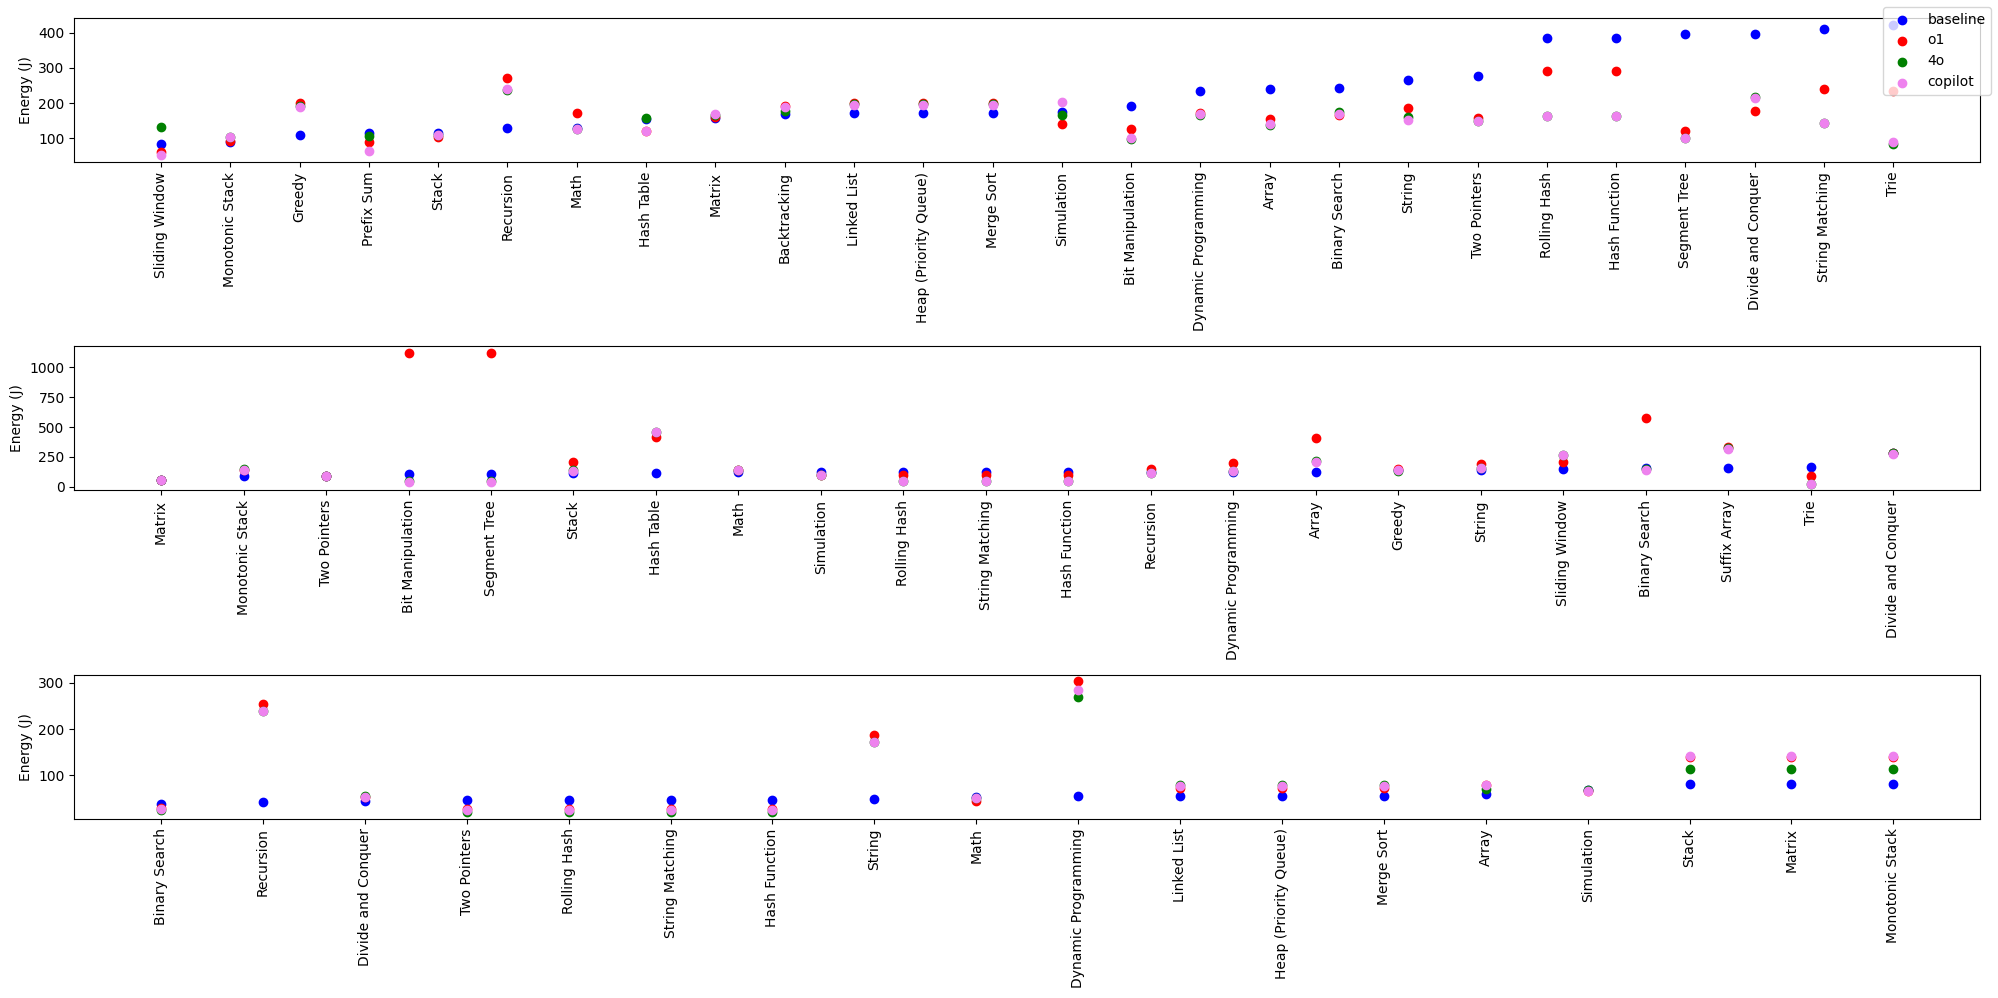

In [13]:
fig, axs = plt.subplots(3, 1)
fig.set_figwidth(20)
fig.set_figheight(10)
values=getValues("Python")
axs[0].set_ylabel("Energy (J)")
axs[0].scatter(x=values["human"].keys(), y=values["human"].values(), label="baseline", color="blue")
axs[0].scatter(x=values["o1"].keys(), y=values["o1"].values(), label="o1", color="red")
axs[0].scatter(x=values["4o"].keys(), y=values["4o"].values(), label="4o", color="green")
axs[0].scatter(x=values["copilot"].keys(), y=values["copilot"].values(), label="copilot", color="violet")
axs[0].tick_params(axis='x', rotation=90)
print("here")
values=getValues("Java")
axs[1].set_ylabel("Energy (J)")
axs[1].scatter(x=values["human"].keys(), y=values["human"].values(), color="blue")
axs[1].scatter(x=values["o1"].keys(), y=values["o1"].values(), color="red")
axs[1].scatter(x=values["4o"].keys(), y=values["4o"].values(),  color="green")
axs[1].scatter(x=values["copilot"].keys(), y=values["copilot"].values(), color="violet")
axs[1].tick_params(axis='x', rotation=90)
values=getValues("C++")
axs[2].set_ylabel("Energy (J)")
axs[2].scatter(x=values["human"].keys(), y=values["human"].values(), color="blue")
axs[2].scatter(x=values["o1"].keys(), y=values["o1"].values(), color="red")
axs[2].scatter(x=values["4o"].keys(), y=values["4o"].values(),  color="green")
axs[2].scatter(x=values["copilot"].keys(), y=values["copilot"].values(), color="violet")
axs[2].tick_params(axis='x', rotation=90)
fig.tight_layout() 
fig.legend()
#fig.savefig("Ubuntu_Tags.png", bbox_inches='tight', dpi=500)

Array
15
Two Pointers
2
Dynamic Programming
6
Stack
4
Monotonic Stack
3
Hash Table
3
String
10
Sliding Window
2
Backtracking
3
Matrix
2
Greedy
1
Recursion
3
Binary Search
5
Prefix Sum
1
Bit Manipulation
2
Segment Tree
3
Math
1
Linked List
1
Divide and Conquer
3
Heap (Priority Queue)
1
Merge Sort
1
Simulation
1
Rolling Hash
3
String Matching
4
Hash Function
3
Trie
2
Array
12
Hash Table
4
Dynamic Programming
6
Stack
4
Matrix
1
Monotonic Stack
3
Binary Search
5
Bit Manipulation
2
Segment Tree
2
Two Pointers
2
Rolling Hash
3
String Matching
3
Hash Function
3
String
9
Sliding Window
3
Recursion
3
Math
1
Simulation
1
Greedy
1
Suffix Array
1
Trie
1
Divide and Conquer
1
Array
3
Binary Search
2
Divide and Conquer
2
String
3
Dynamic Programming
2
Recursion
2
Two Pointers
1
Rolling Hash
1
String Matching
1
Hash Function
1
Math
1
Linked List
1
Heap (Priority Queue)
1
Merge Sort
1
Simulation
1
Stack
1
Matrix
1
Monotonic Stack
1


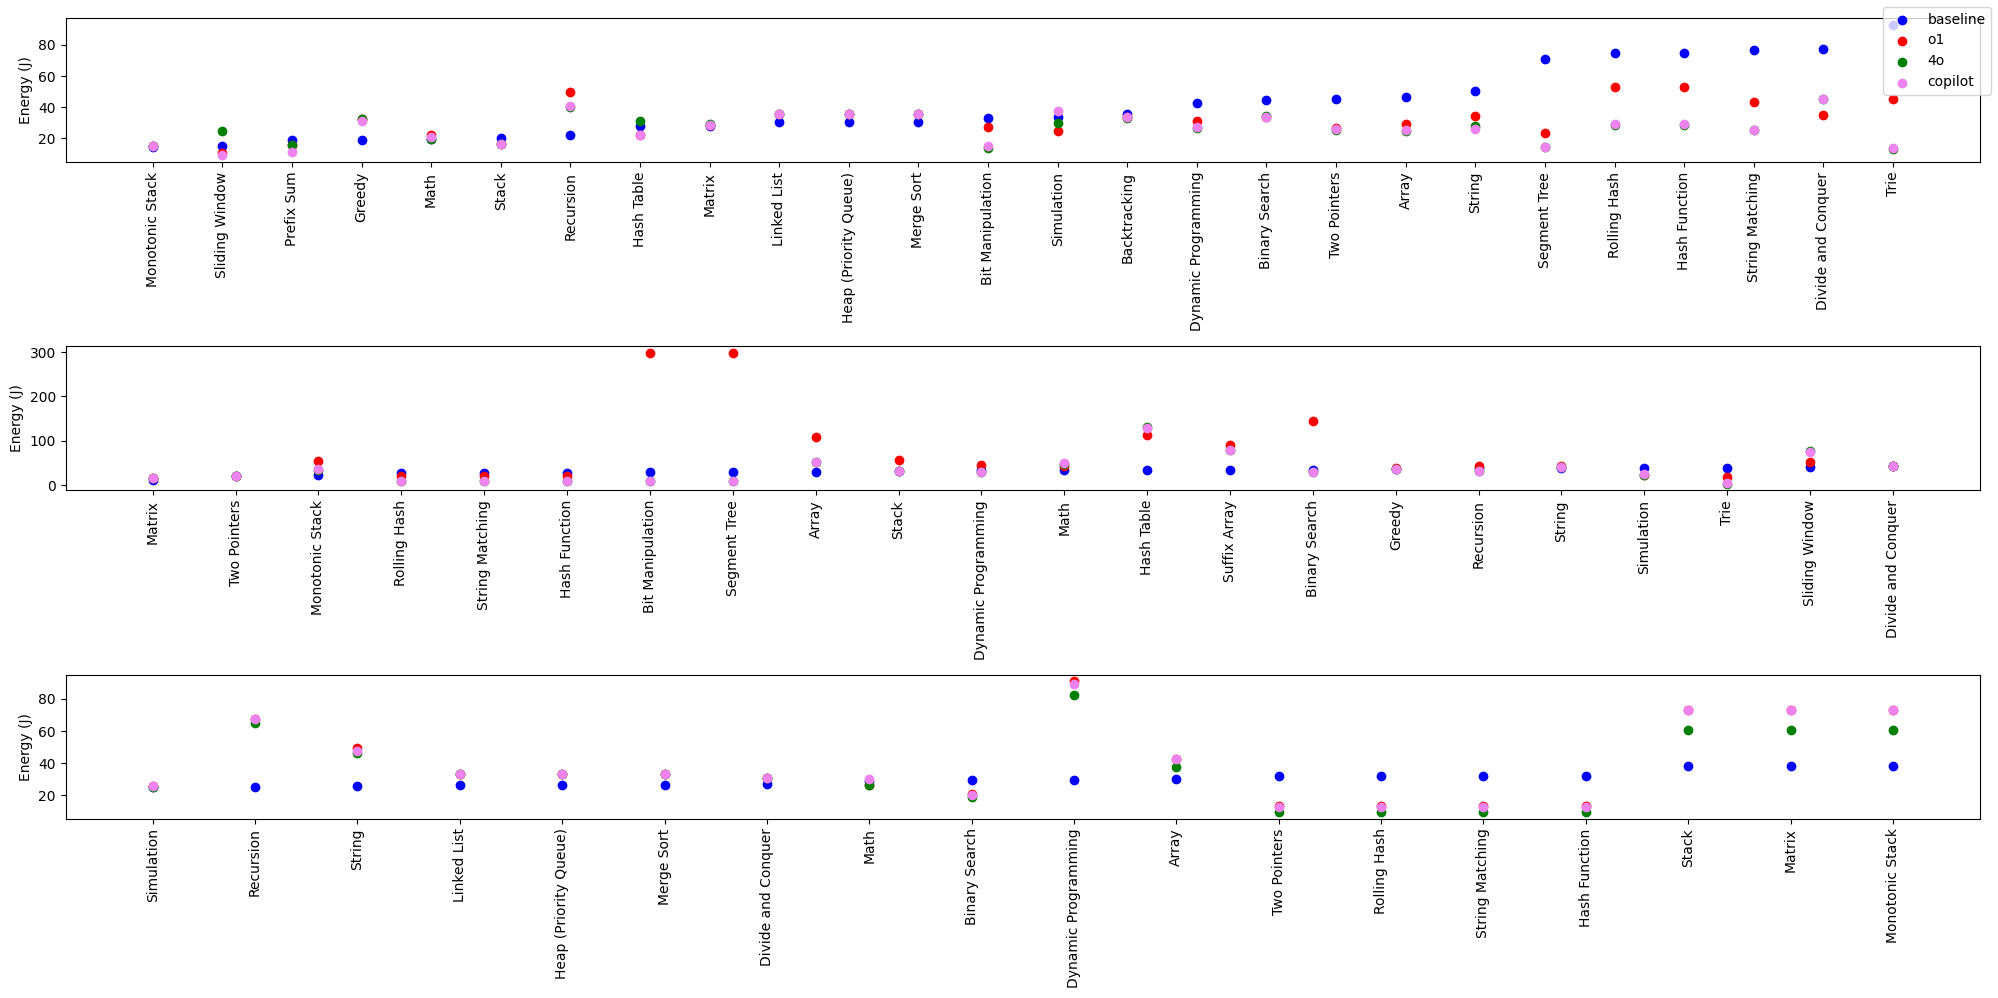

In [14]:
fig, axs = plt.subplots(3, 1)
fig.set_figwidth(20)
fig.set_figheight(10)
values=getValues("Python")
axs[0].set_ylabel("Energy (J)")
axs[0].scatter(x=values["human_pw"].keys(), y=values["human_pw"].values(), label="baseline", color="blue")
axs[0].scatter(x=values["o1_pw"].keys(), y=values["o1_pw"].values(), label="o1", color="red")
axs[0].scatter(x=values["4o_pw"].keys(), y=values["4o_pw"].values(), label="4o", color="green")
axs[0].scatter(x=values["copilot_pw"].keys(), y=values["copilot_pw"].values(), label="copilot", color="violet")
axs[0].tick_params(axis='x', rotation=90)
values=getValues("Java")
axs[1].set_ylabel("Energy (J)")
axs[1].scatter(x=values["human_pw"].keys(), y=values["human_pw"].values(), color="blue")
axs[1].scatter(x=values["o1_pw"].keys(), y=values["o1_pw"].values(), color="red")
axs[1].scatter(x=values["4o_pw"].keys(), y=values["4o_pw"].values(),  color="green")
axs[1].scatter(x=values["copilot_pw"].keys(), y=values["copilot_pw"].values(), color="violet")
axs[1].tick_params(axis='x', rotation=90)
values=getValues("C++")
axs[2].set_ylabel("Energy (J)")
axs[2].scatter(x=values["human_pw"].keys(), y=values["human_pw"].values(), color="blue")
axs[2].scatter(x=values["o1_pw"].keys(), y=values["o1_pw"].values(), color="red")
axs[2].scatter(x=values["4o_pw"].keys(), y=values["4o_pw"].values(),  color="green")
axs[2].scatter(x=values["copilot_pw"].keys(), y=values["copilot_pw"].values(), color="violet")
axs[2].tick_params(axis='x', rotation=90)
fig.tight_layout() 
fig.legend()
fig.savefig("mac_Tags.png", bbox_inches='tight', dpi=500)

Array
15
Two Pointers
2
Dynamic Programming
6
Stack
4
Monotonic Stack
3
Hash Table
3
String
10
Sliding Window
2
Backtracking
3
Matrix
2
Greedy
1
Recursion
3
Binary Search
5
Prefix Sum
1
Bit Manipulation
2
Segment Tree
3
Math
1
Linked List
1
Divide and Conquer
3
Heap (Priority Queue)
1
Merge Sort
1
Simulation
1
Rolling Hash
3
String Matching
4
Hash Function
3
Trie
2


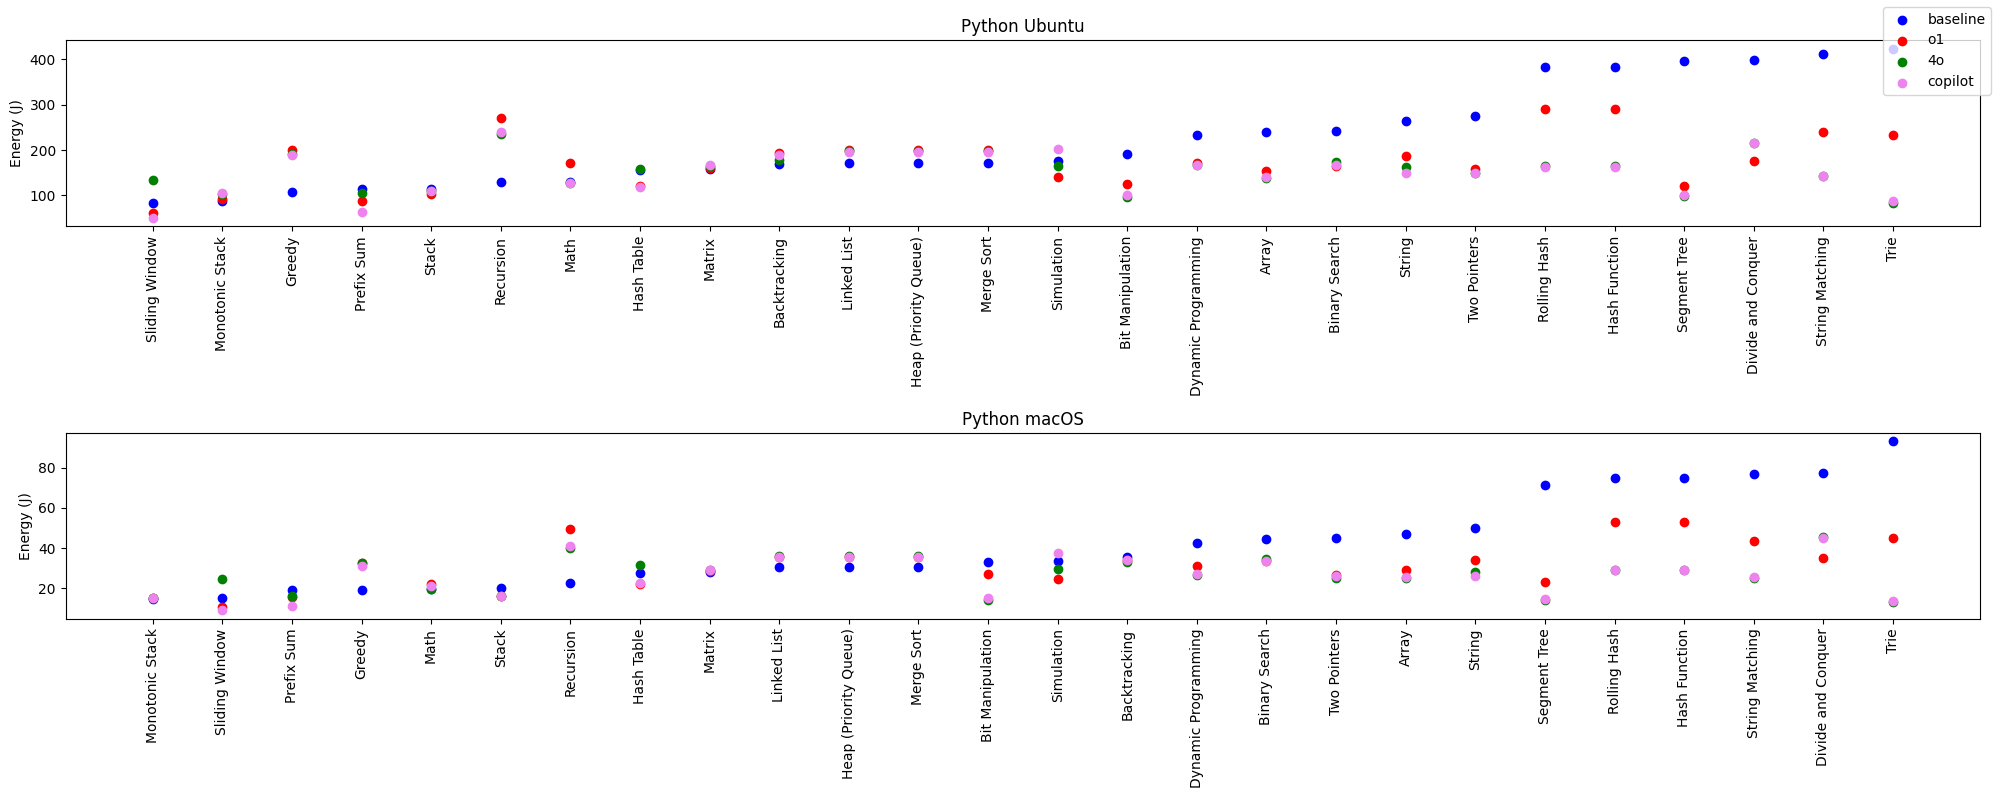

In [16]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(20)
fig.set_figheight(8)
values=getValues("Python")
axs[0].set_ylabel("Energy (J)")
axs[0].set_title("Python Ubuntu")
axs[0].scatter(x=values["human"].keys(), y=values["human"].values(), label="baseline", color="blue")
axs[0].scatter(x=values["o1"].keys(), y=values["o1"].values(), label="o1", color="red")
axs[0].scatter(x=values["4o"].keys(), y=values["4o"].values(), label="4o", color="green")
axs[0].scatter(x=values["copilot"].keys(), y=values["copilot"].values(), label="copilot", color="violet")
axs[0].tick_params(axis='x', rotation=90)
axs[1].set_title("Python macOS")
axs[1].set_ylabel("Energy (J)")
axs[1].scatter(x=values["human_pw"].keys(), y=values["human_pw"].values(), color="blue")
axs[1].scatter(x=values["o1_pw"].keys(), y=values["o1_pw"].values(), color="red")
axs[1].scatter(x=values["4o_pw"].keys(), y=values["4o_pw"].values(), color="green")
axs[1].scatter(x=values["copilot_pw"].keys(), y=values["copilot_pw"].values(),  color="violet")
axs[1].tick_params(axis='x', rotation=90)

fig.tight_layout() 
fig.legend()
fig.savefig("Python_Tags.png", bbox_inches='tight', dpi=500)

Array
12
Hash Table
4
Dynamic Programming
6
Stack
4
Matrix
1
Monotonic Stack
3
Binary Search
5
Bit Manipulation
2
Segment Tree
2
Two Pointers
2
Rolling Hash
3
String Matching
3
Hash Function
3
String
9
Sliding Window
3
Recursion
3
Math
1
Simulation
1
Greedy
1
Suffix Array
1
Trie
1
Divide and Conquer
1


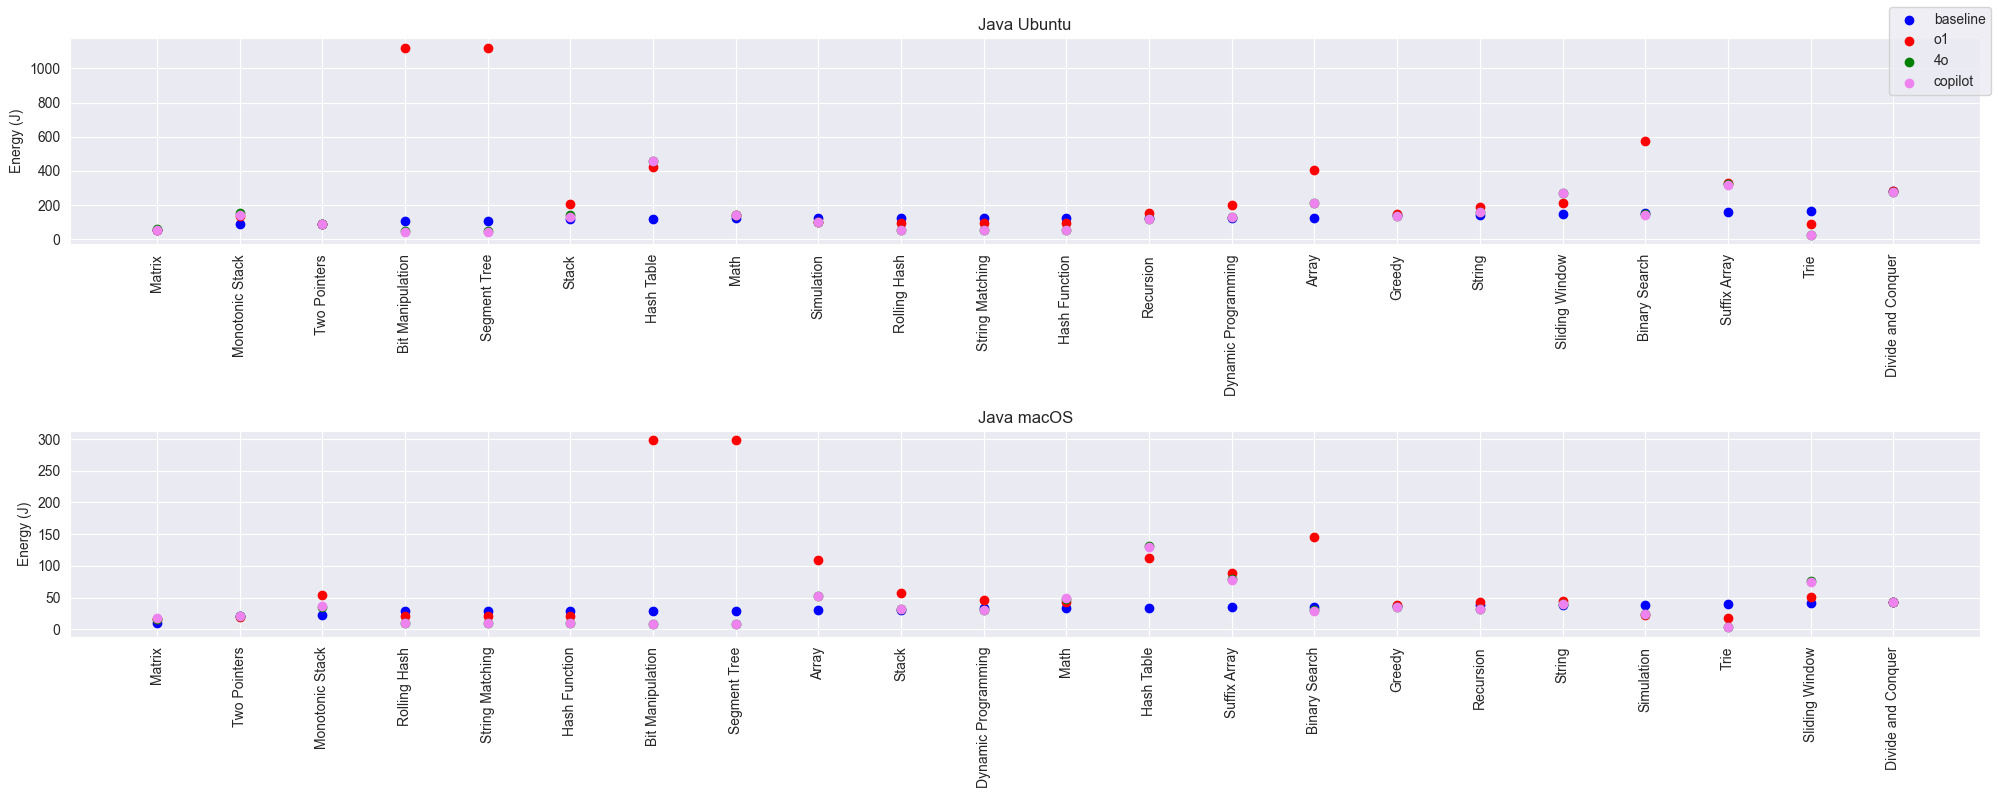

In [21]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(20)
fig.set_figheight(8)
values=getValues("Java")
axs[0].set_ylabel("Energy (J)")
axs[0].set_title("Java Ubuntu")
axs[0].scatter(x=values["human"].keys(), y=values["human"].values(), label="baseline", color="blue")
axs[0].scatter(x=values["o1"].keys(), y=values["o1"].values(), label="o1", color="red")
axs[0].scatter(x=values["4o"].keys(), y=values["4o"].values(), label="4o", color="green")
axs[0].scatter(x=values["copilot"].keys(), y=values["copilot"].values(), label="copilot", color="violet")
axs[0].tick_params(axis='x', rotation=90)
axs[1].set_title("Java macOS")
axs[1].set_ylabel("Energy (J)")
axs[1].scatter(x=values["human_pw"].keys(), y=values["human_pw"].values(), color="blue")
axs[1].scatter(x=values["o1_pw"].keys(), y=values["o1_pw"].values(), color="red")
axs[1].scatter(x=values["4o_pw"].keys(), y=values["4o_pw"].values(), color="green")
axs[1].scatter(x=values["copilot_pw"].keys(), y=values["copilot_pw"].values(),  color="violet")
axs[1].tick_params(axis='x', rotation=90)

fig.tight_layout() 
fig.legend()
fig.savefig("Java_Tags.png", bbox_inches='tight', dpi=500)

/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Array
3
Binary Search
2
Divide and Conquer
2
String
3
Dynamic Programming
2
Recursion
2
Two Pointers
1
Rolling Hash
1
String Matching
1
Hash Function
1
Math
1
Linked List
1
Heap (Priority Queue)
1
Merge Sort
1
Simulation
1
Stack
1
Matrix
1
Monotonic Stack
1


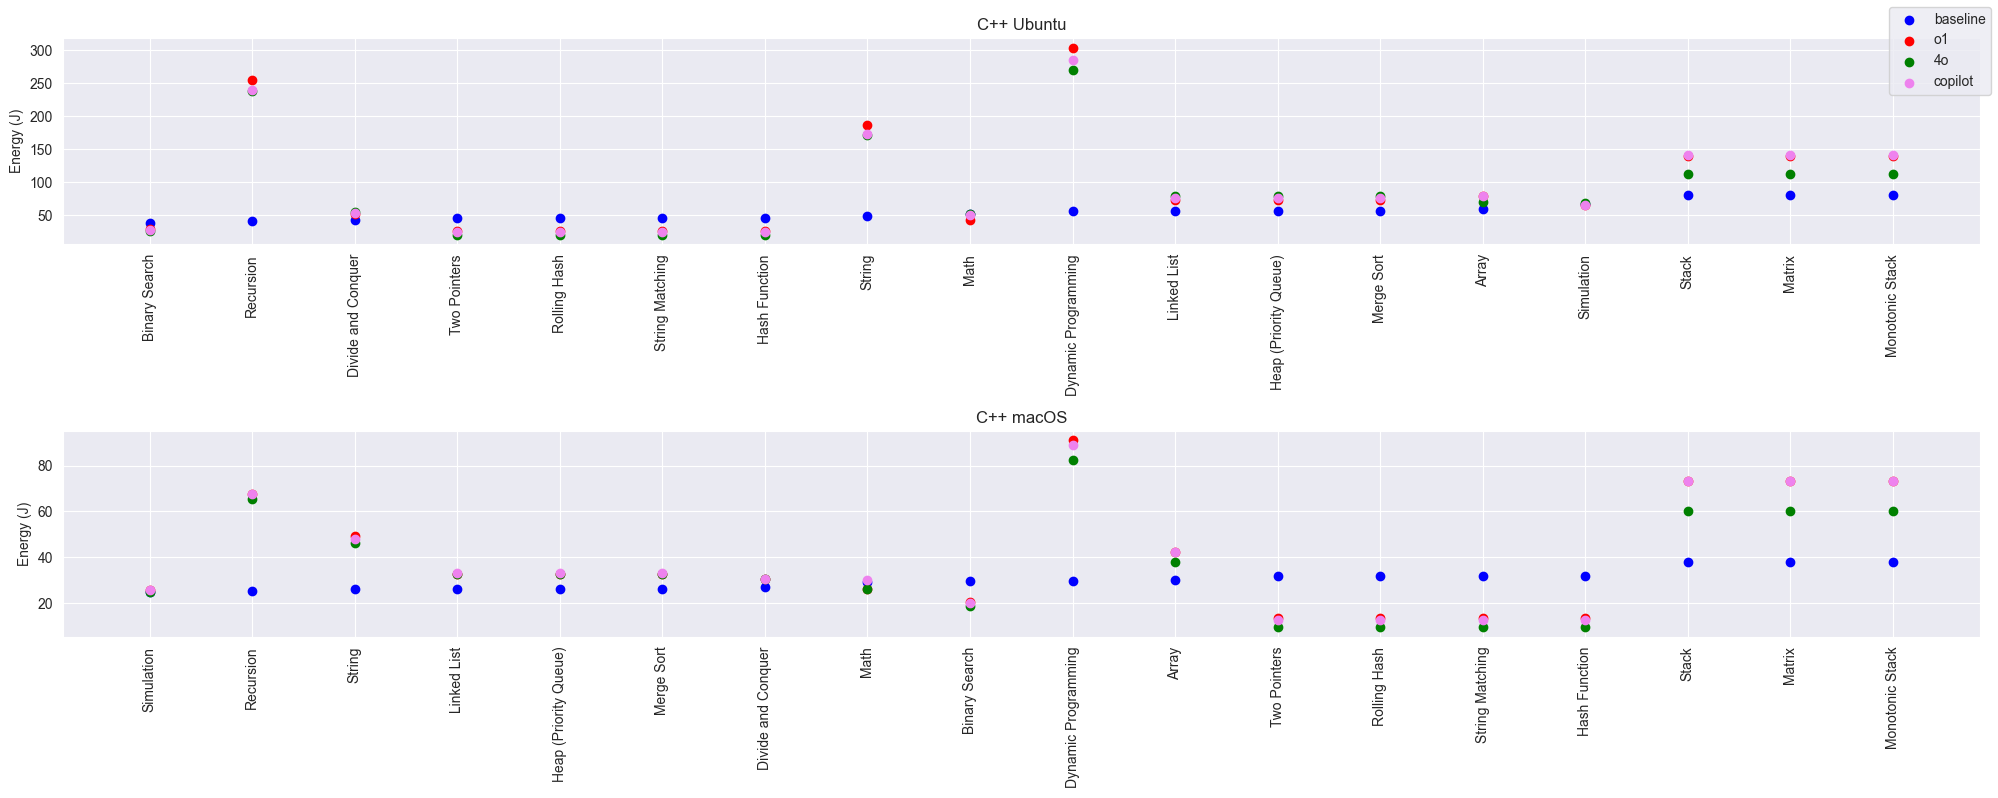

In [22]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(20)
fig.set_figheight(8)
values=getValues("C++")
axs[0].set_ylabel("Energy (J)")
axs[0].set_title("C++ Ubuntu")
axs[0].scatter(x=values["human"].keys(), y=values["human"].values(), label="baseline", color="blue")
axs[0].scatter(x=values["o1"].keys(), y=values["o1"].values(), label="o1", color="red")
axs[0].scatter(x=values["4o"].keys(), y=values["4o"].values(), label="4o", color="green")
axs[0].scatter(x=values["copilot"].keys(), y=values["copilot"].values(), label="copilot", color="violet")
axs[0].tick_params(axis='x', rotation=90)
axs[1].set_title("C++ macOS")
axs[1].set_ylabel("Energy (J)")
axs[1].scatter(x=values["human_pw"].keys(), y=values["human_pw"].values(), color="blue")
axs[1].scatter(x=values["o1_pw"].keys(), y=values["o1_pw"].values(), color="red")
axs[1].scatter(x=values["4o_pw"].keys(), y=values["4o_pw"].values(), color="green")
axs[1].scatter(x=values["copilot_pw"].keys(), y=values["copilot_pw"].values(),  color="violet")
axs[1].tick_params(axis='x', rotation=90)

fig.tight_layout() 
fig.legend()
fig.savefig("C_Tags.png", bbox_inches='tight', dpi=500)

Array
15
Two Pointers
2
Dynamic Programming
6
Stack
4
Monotonic Stack
3
Hash Table
3
String
10
Sliding Window
2
Backtracking
3
Matrix
2
Greedy
1
Recursion
3
Binary Search
5
Prefix Sum
1
Bit Manipulation
2
Segment Tree
3
Math
1
Linked List
1
Divide and Conquer
3
Heap (Priority Queue)
1
Merge Sort
1
Simulation
1
Rolling Hash
3
String Matching
4
Hash Function
3
Trie
2


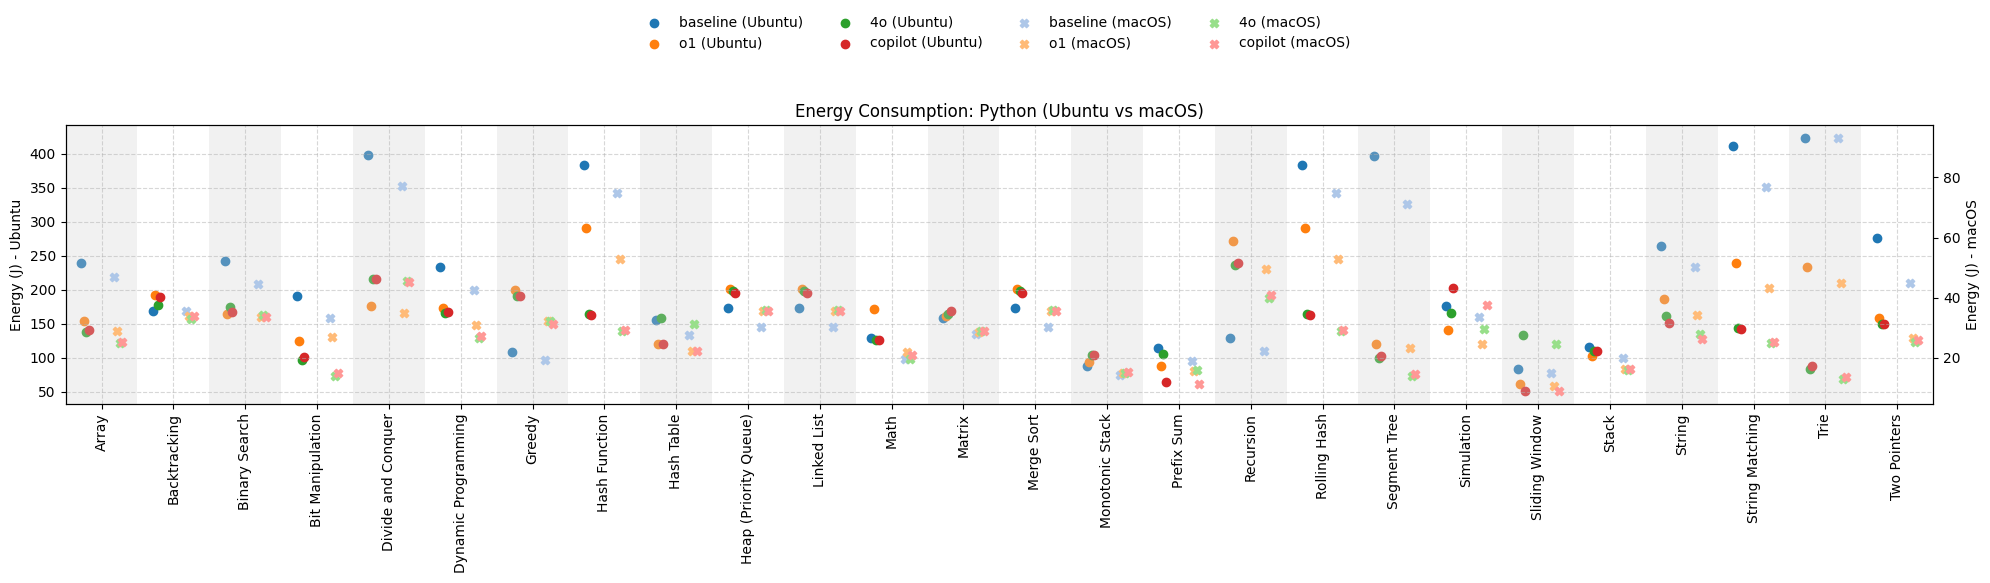

In [80]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Change which language to display here:
model="Python"
# model="Java"
# model="C++"

values = getValues(model)
sorted_keys = sorted(values["human"].keys())

ubuntu_human = [values["human"][key] for key in sorted_keys]
ubuntu_o1 = [values["o1"][key] for key in sorted_keys]
ubuntu_4o = [values["4o"][key] for key in sorted_keys]
ubuntu_copilot = [values["copilot"][key] for key in sorted_keys]

macos_human_pw = [values["human_pw"][key] for key in sorted_keys]
macos_o1_pw = [values["o1_pw"][key] for key in sorted_keys]
macos_4o_pw = [values["4o_pw"][key] for key in sorted_keys]
macos_copilot_pw = [values["copilot_pw"][key] for key in sorted_keys]

colors = cm.tab20.colors
fig, ax1 = plt.subplots(figsize=(20, 5))
fig.set_figwidth(20)
fig.set_figheight(5)

machine_offset = 0.25
# Change if there overlap or not here:
point_offset = 0.035
alpha_value = 1


base_x = np.arange(len(sorted_keys))
ubuntu_x = [x - machine_offset for x in base_x]  # Ubuntu points shifted left
macos_x = [x + machine_offset for x in base_x]  # macOS points shifted right

ax1.set_ylabel("Energy (J) - Ubuntu", color="black")
ax1.set_title(f"Energy Consumption: {model} (Ubuntu vs macOS)")
ax1.scatter([x - point_offset + machine_offset/2 for x in ubuntu_x], ubuntu_human, label="baseline (Ubuntu)", color=colors[0], alpha=alpha_value)
ax1.scatter([x + machine_offset/2 for x in ubuntu_x], ubuntu_o1, label="o1 (Ubuntu)", color=colors[2], alpha=alpha_value)
ax1.scatter([x + point_offset + machine_offset/2 for x in ubuntu_x], ubuntu_4o, label="4o (Ubuntu)", color=colors[4], alpha=alpha_value)
ax1.scatter([x + 2*point_offset + machine_offset/2 for x in ubuntu_x], ubuntu_copilot, label="copilot (Ubuntu)", color=colors[6], alpha=alpha_value)


ax1.tick_params(axis='x', rotation=90)
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.set_ylabel("Energy (J) - macOS", color="black")
ax2.scatter([x - 2*point_offset + machine_offset/2 for x in macos_x], macos_human_pw, label="baseline (macOS)", color=colors[1], alpha=alpha_value, marker="X")
ax2.scatter([x - point_offset + machine_offset/2 for x in macos_x], macos_o1_pw, label="o1 (macOS)", color=colors[3], alpha=alpha_value, marker="X")
ax2.scatter([x + machine_offset/2 for x in macos_x], macos_4o_pw, label="4o (macOS)", color=colors[5], alpha=alpha_value, marker="X")
ax2.scatter([x + point_offset + machine_offset/2 for x in macos_x], macos_copilot_pw, label="copilot (macOS)", color=colors[7], alpha=alpha_value, marker="X")


xticks = base_x + machine_offset / 2
ax1.set_xticks(xticks)
ax1.set_xticklabels(sorted_keys)
ax1.set_xlim(-0.5 + (machine_offset/2), len(sorted_keys) - 0.5 + (machine_offset/2))
for i in range(len(sorted_keys)):
    if i % 2 == 0:
        ax1.axvspan(i + (machine_offset/2) - 0.5, i + (machine_offset/2) + 0.5, facecolor='lightgray', alpha=0.3)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=4, frameon=False)

fig.tight_layout()
fig.savefig(f"{model}_Tags_Overlap.png", bbox_inches='tight', dpi=500)
plt.show()


/Users/sophieweid/GSDMeasurementCode/LLMGeneratedCodePowerConsumption/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sophieweid/GSDMeasurementCode/LLMGeneratedCodePowerConsumption/venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


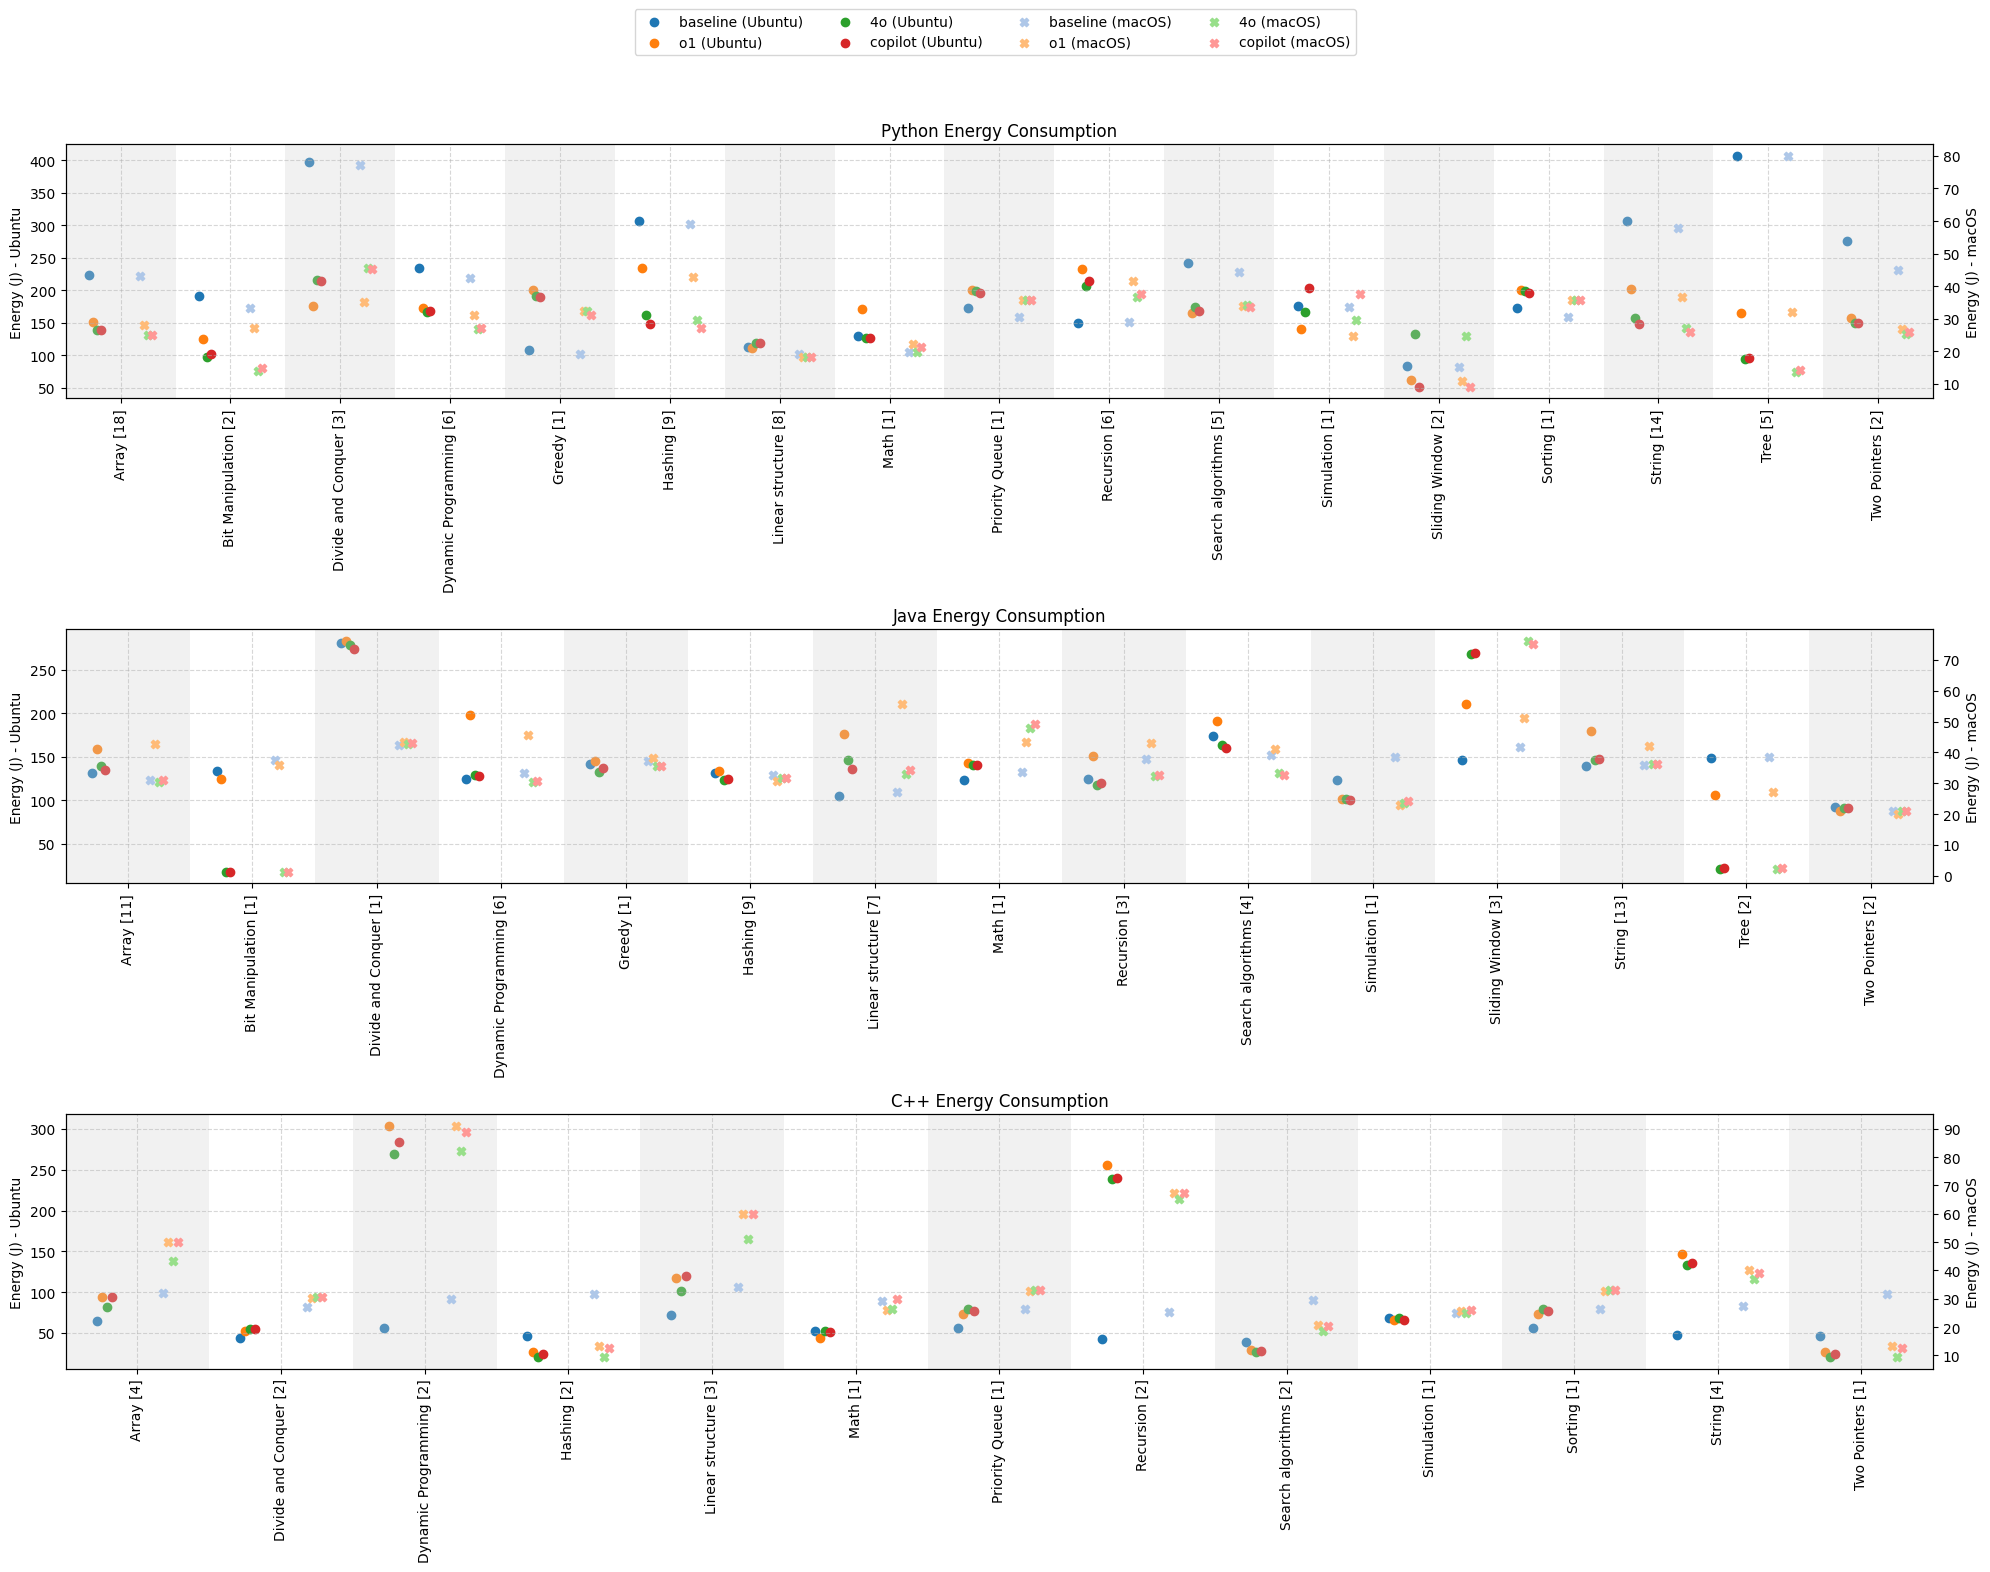

In [41]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Function to generate subplots for a specific model
def plot_model(ax, model, colors, machine_offset, point_offset, alpha_value):
    values = getBroadCategoryValues(model)
    sorted_keys = sorted(values["human"].keys())

    ubuntu_human = [values["human"][key] for key in sorted_keys]
    ubuntu_o1 = [values["o1"][key] for key in sorted_keys]
    ubuntu_4o = [values["4o"][key] for key in sorted_keys]
    ubuntu_copilot = [values["copilot"][key] for key in sorted_keys]

    macos_human_pw = [values["human_pw"][key] for key in sorted_keys]
    macos_o1_pw = [values["o1_pw"][key] for key in sorted_keys]
    macos_4o_pw = [values["4o_pw"][key] for key in sorted_keys]
    macos_copilot_pw = [values["copilot_pw"][key] for key in sorted_keys]

    base_x = np.arange(len(sorted_keys))
    ubuntu_x = [x - machine_offset for x in base_x]
    macos_x = [x + machine_offset for x in base_x]

    ax.set_title(f"{model} Energy Consumption")
    ax.scatter([x - point_offset + machine_offset / 2 for x in ubuntu_x], ubuntu_human,
               label="baseline (Ubuntu)", color=colors[0], alpha=alpha_value)
    ax.scatter([x + machine_offset / 2 for x in ubuntu_x], ubuntu_o1,
               label="o1 (Ubuntu)", color=colors[2], alpha=alpha_value)
    ax.scatter([x + point_offset + machine_offset / 2 for x in ubuntu_x], ubuntu_4o,
               label="4o (Ubuntu)", color=colors[4], alpha=alpha_value)
    ax.scatter([x + 2 * point_offset + machine_offset / 2 for x in ubuntu_x], ubuntu_copilot,
               label="copilot (Ubuntu)", color=colors[6], alpha=alpha_value)

    ax2 = ax.twinx()  # Add the right y-axis
    ax2.scatter([x - 2 * point_offset + machine_offset / 2 for x in macos_x], macos_human_pw,
                label="baseline (macOS)", color=colors[1], alpha=alpha_value, marker="X")
    ax2.scatter([x - point_offset + machine_offset / 2 for x in macos_x], macos_o1_pw,
                label="o1 (macOS)", color=colors[3], alpha=alpha_value, marker="X")
    ax2.scatter([x + machine_offset / 2 for x in macos_x], macos_4o_pw,
                label="4o (macOS)", color=colors[5], alpha=alpha_value, marker="X")
    ax2.scatter([x + point_offset + machine_offset / 2 for x in macos_x], macos_copilot_pw,
                label="copilot (macOS)", color=colors[7], alpha=alpha_value, marker="X")

    ax.set_xticks(base_x + machine_offset / 2)
    ax.set_xticklabels(sorted_keys)
    ax.set_xlim(-0.5 + (machine_offset/2), len(sorted_keys) - 0.5 + (machine_offset/2))    
    ax.tick_params(axis='x', rotation=90)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel("Energy (J) - Ubuntu")
    ax2.set_ylabel("Energy (J) - macOS")

    for i in range(len(sorted_keys)):
        if i % 2 == 0:
            ax.axvspan(i + (machine_offset / 2) - 0.5, i + (machine_offset / 2) + 0.5,
                       facecolor='lightgray', alpha=0.3)
    return [ax, ax2]


# General settings
colors = cm.tab20.colors
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
machine_offset = 0.25
point_offset = 0.035
alpha_value = 1

# Plot for each model
models = ["Python", "Java", "C++"]
for ax, model in zip(axs, models):
    ax1, ax2 = (plot_model(ax, model, colors, machine_offset, point_offset, alpha_value))

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower center", bbox_to_anchor=(0.5, 1.01), ncol=4)

# Adjust layout and save the figure
fig.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for the legend
fig.savefig("Combined_Tags_Comparison.png", bbox_inches='tight', dpi=500)
plt.show()
